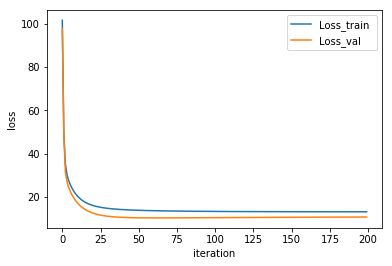

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import time
import jupyter


%matplotlib inline

mem = Memory("./mycache")
@mem.cache

def get_data():
    data = load_svmlight_file("Housing.txt")
    return data[0], data[1]

# 计算损失函数
def cost_fn(x, y, heta):
    return 0.5 * (y - x.dot(heta)).transpose().dot((y - x.dot(heta)))
    #eturn np.sum((x.dot(heta) - y) ** 2) / (2 * m)

# 计算梯度
def g(x, y, heta):
    return np.dot(X_train.transpose(), np.dot(X_train, heta)) - np.dot(X_train.transpose(), y_train)
     #return np.array((y_pred(X_train,theta)- y).dot(x)).reshape(theta) / m

    
X, y = get_data()
X = X.toarray()
m = y.shape[0]
y=y.reshape(m,1)
    
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

  
    
heta = np.random.random(size = (X_train.shape[1], 1))#初始化
alpha = 0.0011#学习率
 # 迭代的次数   
iteration = 200 

Loss_train = []
Loss_val = []

# 梯度下降法更新参数
for i in range(iteration):
    #更新参数
    heta = heta - a * (g(X_train,y_train,heta))
    loss_train = (y_train - X_train.dot(heta)).transpose().dot((y_train - X_train.dot(heta)))/2
    loss_val = (y_val-X_val.dot(heta)).transpose().dot((y_val - X_val.dot(heta)))/2
    Loss_train.append(loss_train[0] /  X_train.shape[0])
    Loss_val.append(loss_val[0] /  X_val.shape[0])
    
plt.plot(Loss_train,label='Loss_train ')
plt.plot(Loss_val, label='Loss_val')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()
plt.show()
